In [29]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load

from timeit import default_timer as timer

#Wczytanie i znormalizowanie danych wejsciowych

print("Wczytywanie danych treningowych...")
DANE_IN=pd.read_csv('Input_Vectors.csv', sep=',',header=None)
TARGET = pd.read_csv('TargetN.csv', sep=',',header=None)


print("Wczytano.")
print("")
print("Wektory sumarycznie: "+str(len(TARGET)))
print("")
print("Skalowanie...")
DANE_IN = DANE_IN.rename(columns={0: "ANGLE", 1: "POSITION", 2: "V_pole", 3: "V_cart"})
TARGET = TARGET.rename(columns={0: "FORCE"})

DANE_IN['ANGLE'] = DANE_IN['ANGLE'].div(15)
DANE_IN['V_pole'] = DANE_IN['V_pole'].div(4)
DANE_IN['V_cart'] = DANE_IN['V_cart'].div(2)

TARGET['FORCE'] = TARGET['FORCE'].div(30)
TARGET['FORCE'] = TARGET['FORCE'].add(0.5)

print("Przeskalowano z zakresem <0; 1>")
X = DANE_IN.values
Y = TARGET.values

X_tren, x_val, Y_tren, y_val = train_test_split(X,Y,train_size=0.70,random_state=16)

print("Wektory treningowe: "+str(len(Y_tren)))
print("Wektory walidacyjne: "+str(len(y_val)))
print("")
model = input("wpisz nazwe modelu: ")
model = model +".h5"
LOSS = float(input("Wpisz wartosc minimalnej funkcji strat: "))

#wczytanie modelu nietrenowanego
model1 = tf.keras.models.load_model(model)
print("Wczytano model sieci.")
print("Rozpoczecie treningu.")

czasy = []
historLoss = []
historAccur = []

actuall = 100.0
while(actuall>LOSS):
    start = timer()
    History = model1.fit(X_tren, Y_tren, epochs=200, 
                         batch_size=50, verbose=2,validation_data=(x_val, y_val))
    historLoss.extend(History.history['loss'])    
    ost = len(History.history['loss'])
    actuall = History.history['loss'][ost-1]
    end = timer()
    czasy.append(end-start)

print("")
print("")
print("===================================================")
print("CZAS NAUKI: "+str(np.sum(czasy))+" s")

np.savetxt("TREN"+model[:-3]+".csv", np.array(historLoss), delimiter=',')
np.savetxt("CZAS"+model[:-3]+".csv", np.array(czasy), delimiter=',')

model1.save('TREN'+model)
print("")
print("ZAPISANO WYNIKI")

Wczytywanie danych treningowych...
Wczytano.
Skalowanie...
Przeskalowano <-1; 1>
wpisz nazwe modelu: modelH6
Wpisz wartosc minimalnej funkcji strat: 11.0
Wczytano model sieci.
Rozpoczecie treningu.
Train on 31499 samples, validate on 13501 samples
Epoch 1/200
31499/31499 - 1s - loss: 13.3937 - mean_absolute_error: 0.0658 - val_loss: 4.9152 - val_mean_absolute_error: 0.0227
Epoch 2/200
31499/31499 - 1s - loss: 4.9182 - mean_absolute_error: 0.0225 - val_loss: 4.5495 - val_mean_absolute_error: 0.0211
Epoch 3/200
31499/31499 - 1s - loss: 4.3000 - mean_absolute_error: 0.0197 - val_loss: 3.5715 - val_mean_absolute_error: 0.0165
Epoch 4/200
31499/31499 - 1s - loss: 2.6799 - mean_absolute_error: 0.0121 - val_loss: 1.4782 - val_mean_absolute_error: 0.0066
Epoch 5/200
31499/31499 - 1s - loss: 1.1846 - mean_absolute_error: 0.0052 - val_loss: 1.0782 - val_mean_absolute_error: 0.0048
Epoch 6/200
31499/31499 - 1s - loss: 1.0810 - mean_absolute_error: 0.0048 - val_loss: 1.1025 - val_mean_absolute_err

Epoch 64/200
31499/31499 - 1s - loss: 0.9566 - mean_absolute_error: 0.0044 - val_loss: 0.9209 - val_mean_absolute_error: 0.0042
Epoch 65/200
31499/31499 - 1s - loss: 0.9546 - mean_absolute_error: 0.0044 - val_loss: 0.9206 - val_mean_absolute_error: 0.0042
Epoch 66/200
31499/31499 - 1s - loss: 0.9545 - mean_absolute_error: 0.0044 - val_loss: 0.9380 - val_mean_absolute_error: 0.0043
Epoch 67/200
31499/31499 - 1s - loss: 0.9549 - mean_absolute_error: 0.0044 - val_loss: 0.9223 - val_mean_absolute_error: 0.0042
Epoch 68/200
31499/31499 - 1s - loss: 0.9545 - mean_absolute_error: 0.0044 - val_loss: 0.9236 - val_mean_absolute_error: 0.0043
Epoch 69/200
31499/31499 - 1s - loss: 0.9527 - mean_absolute_error: 0.0044 - val_loss: 0.9185 - val_mean_absolute_error: 0.0042
Epoch 70/200
31499/31499 - 1s - loss: 0.9564 - mean_absolute_error: 0.0044 - val_loss: 0.9279 - val_mean_absolute_error: 0.0043
Epoch 71/200
31499/31499 - 1s - loss: 0.9503 - mean_absolute_error: 0.0043 - val_loss: 0.9188 - val_mean

Epoch 128/200
31499/31499 - 1s - loss: 0.9266 - mean_absolute_error: 0.0043 - val_loss: 0.9205 - val_mean_absolute_error: 0.0043
Epoch 129/200
31499/31499 - 1s - loss: 0.9230 - mean_absolute_error: 0.0043 - val_loss: 0.8892 - val_mean_absolute_error: 0.0041
Epoch 130/200
31499/31499 - 1s - loss: 0.9294 - mean_absolute_error: 0.0043 - val_loss: 0.9119 - val_mean_absolute_error: 0.0043
Epoch 131/200
31499/31499 - 1s - loss: 0.9259 - mean_absolute_error: 0.0043 - val_loss: 0.8967 - val_mean_absolute_error: 0.0042
Epoch 132/200
31499/31499 - 1s - loss: 0.9266 - mean_absolute_error: 0.0043 - val_loss: 0.9175 - val_mean_absolute_error: 0.0043
Epoch 133/200
31499/31499 - 1s - loss: 0.9243 - mean_absolute_error: 0.0043 - val_loss: 0.8910 - val_mean_absolute_error: 0.0041
Epoch 134/200
31499/31499 - 1s - loss: 0.9266 - mean_absolute_error: 0.0043 - val_loss: 0.8944 - val_mean_absolute_error: 0.0042
Epoch 135/200
31499/31499 - 1s - loss: 0.9224 - mean_absolute_error: 0.0043 - val_loss: 0.8938 - 

Epoch 192/200
31499/31499 - 1s - loss: 0.9154 - mean_absolute_error: 0.0043 - val_loss: 0.8806 - val_mean_absolute_error: 0.0041
Epoch 193/200
31499/31499 - 1s - loss: 0.9108 - mean_absolute_error: 0.0042 - val_loss: 0.8815 - val_mean_absolute_error: 0.0041
Epoch 194/200
31499/31499 - 1s - loss: 0.9128 - mean_absolute_error: 0.0042 - val_loss: 0.8793 - val_mean_absolute_error: 0.0041
Epoch 195/200
31499/31499 - 1s - loss: 0.9160 - mean_absolute_error: 0.0043 - val_loss: 0.8898 - val_mean_absolute_error: 0.0042
Epoch 196/200
31499/31499 - 1s - loss: 0.9120 - mean_absolute_error: 0.0042 - val_loss: 0.8741 - val_mean_absolute_error: 0.0041
Epoch 197/200
31499/31499 - 1s - loss: 0.9085 - mean_absolute_error: 0.0042 - val_loss: 0.8741 - val_mean_absolute_error: 0.0041
Epoch 198/200
31499/31499 - 1s - loss: 0.9130 - mean_absolute_error: 0.0042 - val_loss: 0.8747 - val_mean_absolute_error: 0.0041
Epoch 199/200
31499/31499 - 1s - loss: 0.9120 - mean_absolute_error: 0.0042 - val_loss: 0.8740 - 

In [36]:
len(History.history['loss'])
np.savetxt("CZAS"+model[:-3]+".csv", np.array(History.history['loss']), delimiter=',')


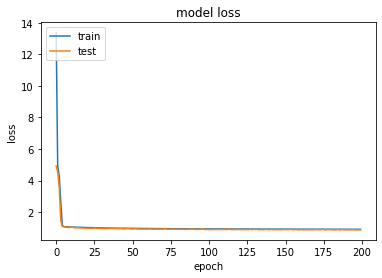

In [30]:
import matplotlib.pyplot as plt

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modeleNN = ["model4.h5", "model8.h5", "model84.h5", "model88.h5"]
for modNN in modeleNN:
    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load

df=pd.read_csv('input_vectors.csv', sep=',',header=None)
dy = pd.read_csv('target.csv', sep=',',header=None)
X = df.values
Y = dy.values

In [ ]:
len(Y)

In [ ]:
print("Wczytano.")
print("Skalowanie...")

nowe_sclac = np.array([[-180.0,-35.0,-40.0,-40.0],[180.0,35.0,40.0,40.0]])
scalarX = MinMaxScaler(feature_range=(-1,1)).fit(nowe_sclac)
#scalarX = MinMaxScaler(feature_range=(-1,1)).fit(X)
nowe_Y = np.array([[-40.0],[40.0]])
scalarY = MinMaxScaler(feature_range=(-1,1)).fit(nowe_Y)

minmax_Y = scalarY.fit_transform(Y)
minmax_X = scalarX.fit_transform(X)

TREN_X, x_test, TREN_Y, y_test = train_test_split(
    minmax_X, minmax_Y, test_size=0.75)

In [ ]:
TREN_X

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load

from timeit import default_timer as timer

#Wczytanie i znormalizowanie danych wejsciowych
sciezkaNN = "/home/dawid/Dokumenty/SIECI/projekt/Modele_WYTRENOWANE/Nowe_poTREN"
sciezkaCZAS = "/home/dawid/Dokumenty/SIECI/projekt/CZASY_trening/Nowe_czasy"
print("Wczytywanie danych treningowych...")
df=pd.read_csv('input_vectors.csv', sep=',',header=None)
dy = pd.read_csv('target.csv', sep=',',header=None)
X = df.values
Y = dy.values

print("Wczytano.")
print("Skalowanie...")

nowe_sclac = np.array([[-180.0,-35.0,-40.0,-40.0],[180.0,35.0,40.0,40.0]])
scalarX = MinMaxScaler(feature_range=(-1,1)).fit(nowe_sclac)
#scalarX = MinMaxScaler(feature_range=(-1,1)).fit(X)
nowe_Y = np.array([[-40.0],[40.0]])
scalarY = MinMaxScaler(feature_range=(-1,1)).fit(nowe_Y)

minmax_Y = scalarY.fit_transform(Y)
minmax_X = scalarX.fit_transform(X)
print("Przeskalowano <-1; 1>")
dump(scalarX, 'scalarX.bin', compress=True)
dump(scalarY, 'scalarY.bin', compress=True)
print("Zapisano ustawienia normalizatorów.")
print("")

TREN_X, x_test, TREN_Y, y_test = train_test_split(
    minmax_X, minmax_Y, test_size=0.75)

#d = int(len(minmax_Y)*0.67)
#print("Uzyto wektorow: "+str(d)+"/"+str(len(minmax_Y)))


modeleNN = ["model4.h5", "model8.h5", "model84.h5", "model88.h5"]
LOSS = float(4.5)
for modNN in modeleNN:
    print("==============================================")
    print("TRENNING modelu:  "+modNN)
    model1 = tf.keras.models.load_model(modNN)
    print("Wczytano model sieci.")
    print("Rozpoczecie treningu.")
    
    czasy = []
    histor = []

    actuall = 100.0
    while(actuall>LOSS):
        start = timer()
        History = model1.fit(TREN_X, TREN_Y, epochs=20, batch_size=10, verbose=2)
        histor = histor + History.history['loss']
        ost = len(History.history['loss'])
        actuall = History.history['loss'][ost-1]
        end = timer()
        czasy.append(end-start)

    print("")
    print("")
    print("===================================================")
    print("CZAS NAUKI: "+str(np.sum(czasy))+" s")

    np.savetxt(sciezkaCZAS+"/TREN"+modNN[:-3]+".csv", np.array(histor), delimiter=',')
    np.savetxt(sciezkaCZAS+"/CZAS"+modNN[:-3]+".csv", np.array(czasy), delimiter=',')

    model1.save(sciezkaNN+'/TREN'+modNN)
    print("")
    print("ZAPISANO WYNIKI")

In [ ]:
def Main():
    sciezkaNN = "/home/dawid/Dokumenty/SIECI/projekt/Modele_WYTRENOWANE/Nowe_poTREN"
    sciezkaCZAS = "/home/dawid/Dokumenty/SIECI/projekt/CZASY_trening/Nowe_czasy"
    print("Wczytywanie danych treningowych...")
    df=pd.read_csv('input_vectors.csv', sep=',',header=None)
    dy = pd.read_csv('target.csv', sep=',',header=None)
    X = df.values
    Y = dy.values
    a = input("COCOCOCOCO:")

    print("Wczytano.")
    print("Skalowanie...")

    nowe_sclac = np.array([[-180.0,-35.0,-40.0,-40.0],[180.0,35.0,40.0,40.0]])
    scalarX = MinMaxScaler(feature_range=(-1,1)).fit(nowe_sclac)
    #scalarX = MinMaxScaler(feature_range=(-1,1)).fit(X)
    nowe_Y = np.array([[-40.0],[40.0]])
    scalarY = MinMaxScaler(feature_range=(-1,1)).fit(nowe_Y)

    minmax_Y = scalarY.fit_transform(Y)
    minmax_X = scalarX.fit_transform(X)
    print("Przeskalowano <-1; 1>")
    dump(scalarX, 'scalarX.bin', compress=True)
    dump(scalarY, 'scalarY.bin', compress=True)
    print("Zapisano ustawienia normalizatorów.")
    print("")

    TREN_X, x_test, TREN_Y, y_test = train_test_split(
        minmax_X, minmax_Y, test_size=0.33)

    d = int(len(minmax_Y)*0.67)
    print("Uzyto wektorow: "+str(d)+"/"+str(len(minmax_Y)))


    modeleNN = ["model4.h5", "model8.h5", "model84.h5", "model88.h5"]
    LOSS = float(4.5)
    for modNN in modeleNN:
        print("==============================================")
        print("TRENNING modelu:  "+modNN)
        model1 = tf.keras.models.load_model(modNN)
        print("Wczytano model sieci.")
        print("Rozpoczecie treningu.")
    
        czasy = []
        histor = []

        actuall = 100.0
        while(actuall>LOSS):
            start = timer()
            History = model1.fit(TREN_X, TREN_Y, epochs=20, batch_size=10, verbose=2)
            histor = histor + History.history['loss']
            ost = len(History.history['loss'])
            actuall = History.history['loss'][ost-1]
            end = timer()
            czasy.append(end-start)

        print("")
        print("")
        print("===================================================")
        print("CZAS NAUKI: "+str(np.sum(czasy))+" s")

        np.savetxt(sciezkaCZAS+"/TREN"+modNN[:-3]+".csv", np.array(histor), delimiter=',')
        np.savetxt(sciezkaCZAS+"/CZAS"+modNN[:-3]+".csv", np.array(czasy), delimiter=',')

        model1.save(sciezkaNN+'/TREN'+modNN)
        print("")
        print("ZAPISANO WYNIKI")

In [22]:
X_tren[1]

array([ 0.        , -0.12811793,  0.65449847, -0.64058966])

In [31]:
import os
entries = os.listdir('/home/dawid/Dokumenty/SIECI/projekt/Modele_nietrenowane/MODELE')

In [32]:
entries

['MH810.h5',
 'MH68.h5',
 'MH10.h5',
 'MH486.h5',
 'MH46.h5',
 'MH466.h5',
 'MH8.h5',
 'MH6810.h5',
 'MH6.h5']

In [33]:
for ANN_file in entries:
    print(ANN_file)

MH810.h5
MH68.h5
MH10.h5
MH486.h5
MH46.h5
MH466.h5
MH8.h5
MH6810.h5
MH6.h5
